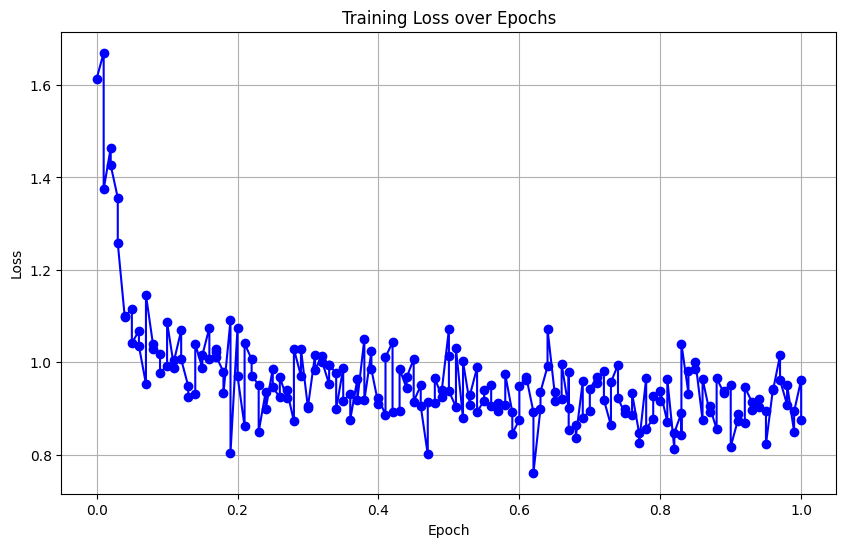

In [1]:
# Unsloth Domain

import matplotlib.pyplot as plt
import re

# Read the content of the file
file_path = 'unsloth_domain.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Initialize lists to store epochs and losses
epochs = []
losses = []

# Extract the epoch and loss values using regular expressions
for line in lines:
    if line.startswith("{'loss':"):
        match = re.search(r"'epoch': (\d+\.\d+)", line)
        if match:
            epoch = float(match.group(1))
            loss = float(re.search(r"'loss': (\d+\.\d+)", line).group(1))
            epochs.append(epoch)
            losses.append(loss)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, losses, marker='o', linestyle='-', color='b')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Save the figure
output_file_path = 'plots/training_loss_unsloth_domain.png'
plt.savefig(output_file_path)

# Show the figure
plt.show()


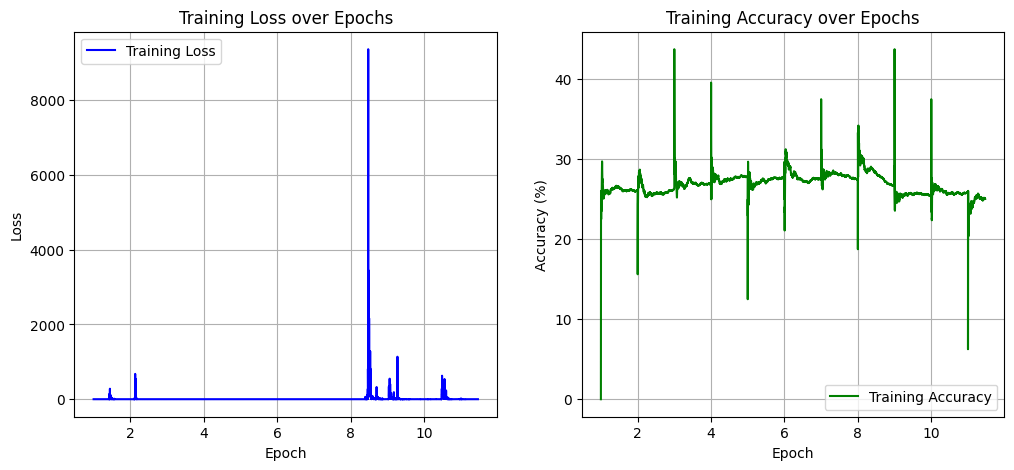

In [2]:
# 10 Epochs Mini

import matplotlib.pyplot as plt
import re

# File path
file_path = 'training_final_mini_15_epoch.txt'

# Initialize lists to store combined batch and epoch, training losses, and training accuracies
batch_epoch_combination = []
training_losses = []
training_accuracies = []

# Read the file and extract the relevant data
with open(file_path, 'r') as file:
    for line in file:
        match = re.search(r'Batch (\d+), Epoch (\d+), Training Loss: ([\d.]+), Training Accuracy: ([\d.]+)%', line)
        if match:
            batch = int(match.group(1))
            epoch = int(match.group(2))
            loss = float(match.group(3))
            accuracy = float(match.group(4))
            batch_epoch_combination.append(epoch + batch / 1249)  # Using a fraction to represent batch within epoch
            training_losses.append(loss)
            training_accuracies.append(accuracy)

# Plot the training loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(batch_epoch_combination, training_losses, label='Training Loss', color='b')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot the training accuracy
plt.subplot(1, 2, 2)
plt.plot(batch_epoch_combination, training_accuracies, label='Training Accuracy', color='g')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

# Save the figure
output_file_path = 'plots/training_loss_and_accuracy_mini.png'
plt.savefig(output_file_path)

# Show the plots
plt.show()

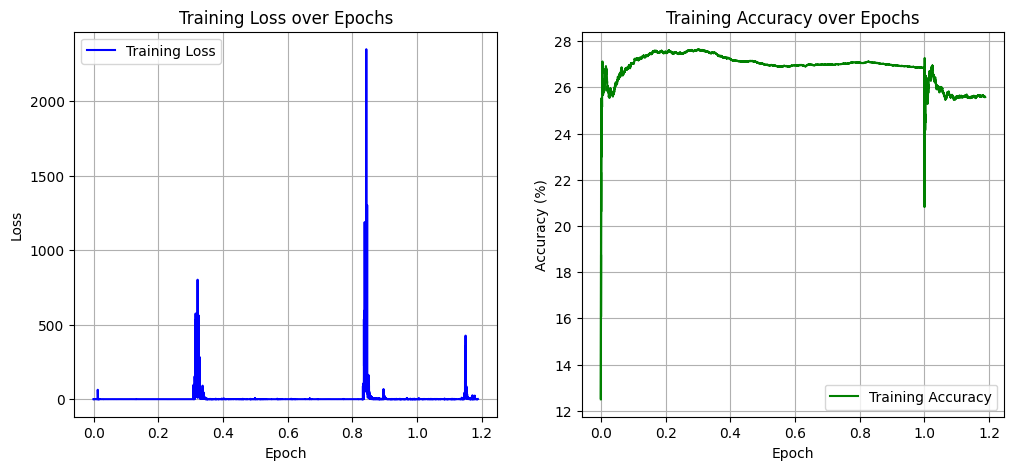

In [3]:
import matplotlib.pyplot as plt
import re

# File path
file_path = 'training_final_mega.txt'

# Initialize lists to store combined batch and epoch, training losses, and training accuracies
batch_epoch_combination = []
training_losses = []
training_accuracies = []

# Read the file and extract the relevant data
with open(file_path, 'r') as file:
    for line in file:
        match = re.search(r'Batch (\d+), Epoch (\d+), Training Loss: ([\d.]+), Training Accuracy: ([\d.]+)%', line)
        if match:
            batch = int(match.group(1))
            epoch = int(match.group(2))
            loss = float(match.group(3))
            accuracy = float(match.group(4))
            batch_epoch_combination.append(epoch - 1 + batch / 11426)  # Using a fraction to represent batch within epoch
            training_losses.append(loss)
            training_accuracies.append(accuracy)

# Plot the training loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(batch_epoch_combination, training_losses, label='Training Loss', color='b')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot the training accuracy
plt.subplot(1, 2, 2)
plt.plot(batch_epoch_combination, training_accuracies, label='Training Accuracy', color='g')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

# Save the figure
output_file_path = 'plots/training_loss_and_accuracy_entire_dataset.png'
plt.savefig(output_file_path)

# Show the plots
plt.show()


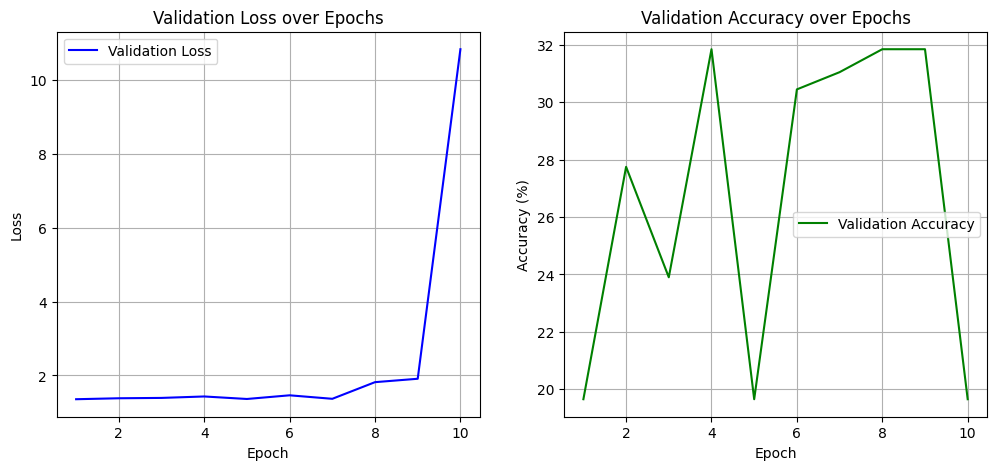

In [4]:
# 10 Epochs Mini

import matplotlib.pyplot as plt
import re

# File path
file_path = 'training_final_mini_15_epoch.txt'

# Initialize lists to store combined batch and epoch, training losses, and training accuracies
batch_epoch_combination = []
training_losses = []
training_accuracies = []

# Read the file and extract the relevant data
with open(file_path, 'r') as file:
    for line in file:
        match = re.search(r'Batch (124), Epoch (\d+), Validation Loss: ([\d.]+), Validation Accuracy: ([\d.]+)%', line)
        if match:
            batch = int(match.group(1))
            epoch = int(match.group(2))
            loss = float(match.group(3))
            accuracy = float(match.group(4))
            batch_epoch_combination.append(epoch)  # Using a fraction to represent batch within epoch
            training_losses.append(loss)
            training_accuracies.append(accuracy)

# Plot the training loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(batch_epoch_combination, training_losses, label='Validation Loss', color='b')
plt.title('Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot the training accuracy
plt.subplot(1, 2, 2)
plt.plot(batch_epoch_combination, training_accuracies, label='Validation Accuracy', color='g')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

# Save the figure
output_file_path = 'plots/validation_loss_and_accuracy_mini.png'
plt.savefig(output_file_path)

# Show the plots
plt.show()

In [8]:
import re
import torch

def extract_tensors(file_path):
    tensors = []
    tensor_pattern = re.compile(r'tensor\(\[(.*?)\]\)', re.DOTALL)
    
    with open(file_path, 'r') as file:
        content = file.read()
        matches = tensor_pattern.findall(content)
        
        for match in matches:
            tensor_values = list(map(int, match.split(',')))
            tensor = torch.tensor(tensor_values)
            tensors.append(tensor)
    
    return tensors

file_path = 'training_final_mini_15_epoch.txt'
extracted_tensors = extract_tensors(file_path)

pairs = []
cumm = [0,0]
for i in range(250, len(extracted_tensors)+1, 250):
    pairs.append([extracted_tensors[i-2] - cumm[0], extracted_tensors[i-1] - cumm[1]])
    cumm[0] = extracted_tensors[i-2]
    cumm[1] = extracted_tensors[i-1]
    # print([extracted_tensors[i-1], extracted_tensors[i]])


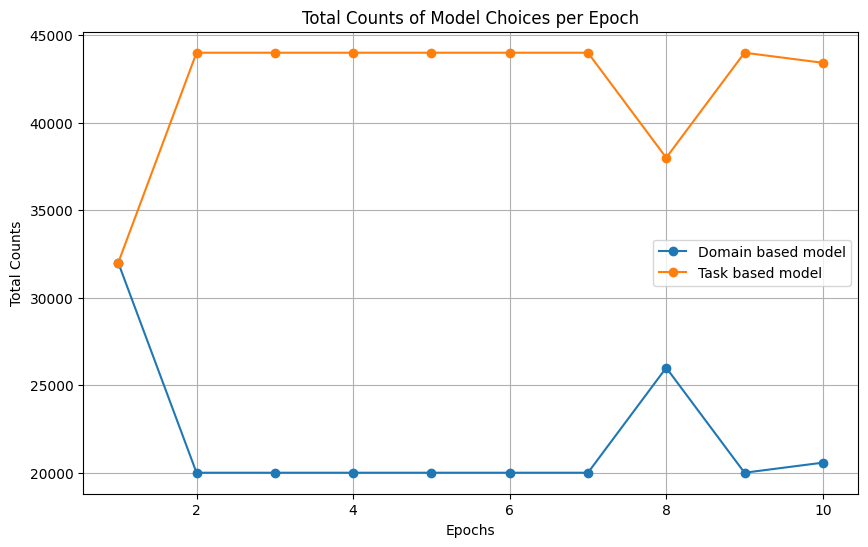

In [9]:
import torch
import matplotlib.pyplot as plt

# Extract model counts for each epoch
model1_counts = [pair[0].sum().item() for pair in pairs]
model2_counts = [pair[1].sum().item() for pair in pairs]

# Plot the results
epochs = list(range(1, len(pairs) + 1))

plt.figure(figsize=(10, 6))
plt.plot(epochs, model1_counts, label='Domain based model', marker='o')
plt.plot(epochs, model2_counts, label='Task based model', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Total Counts')
plt.title('Total Counts of Model Choices per Epoch')
plt.legend()
plt.grid(True)
plt.savefig(f'plots/across_epoch_layers.png')
plt.show()


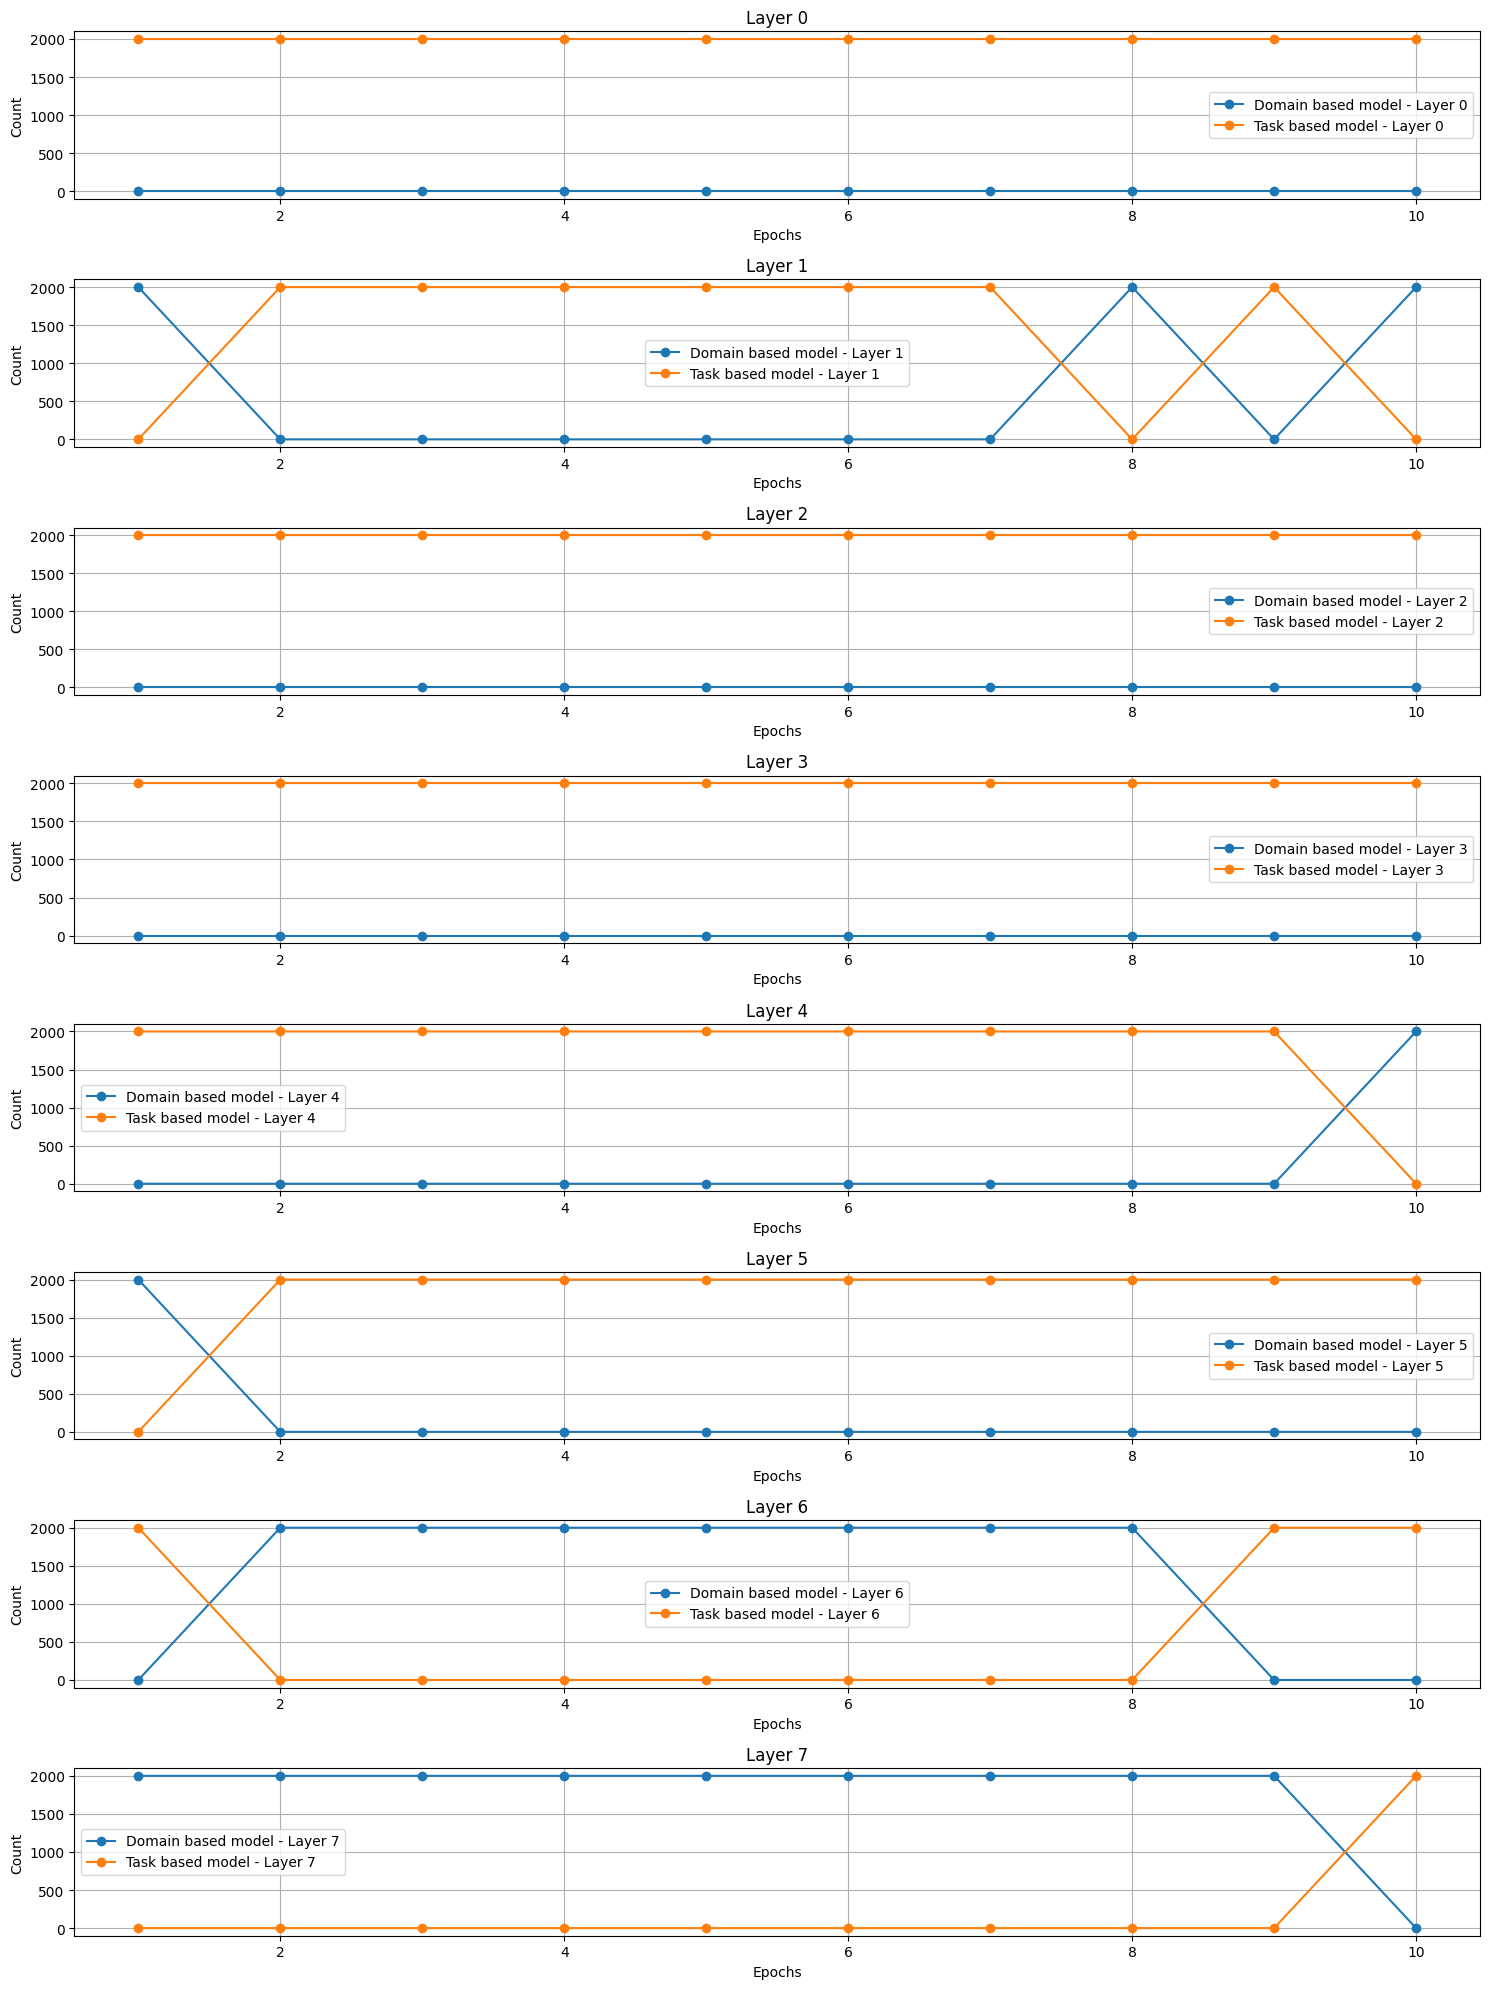

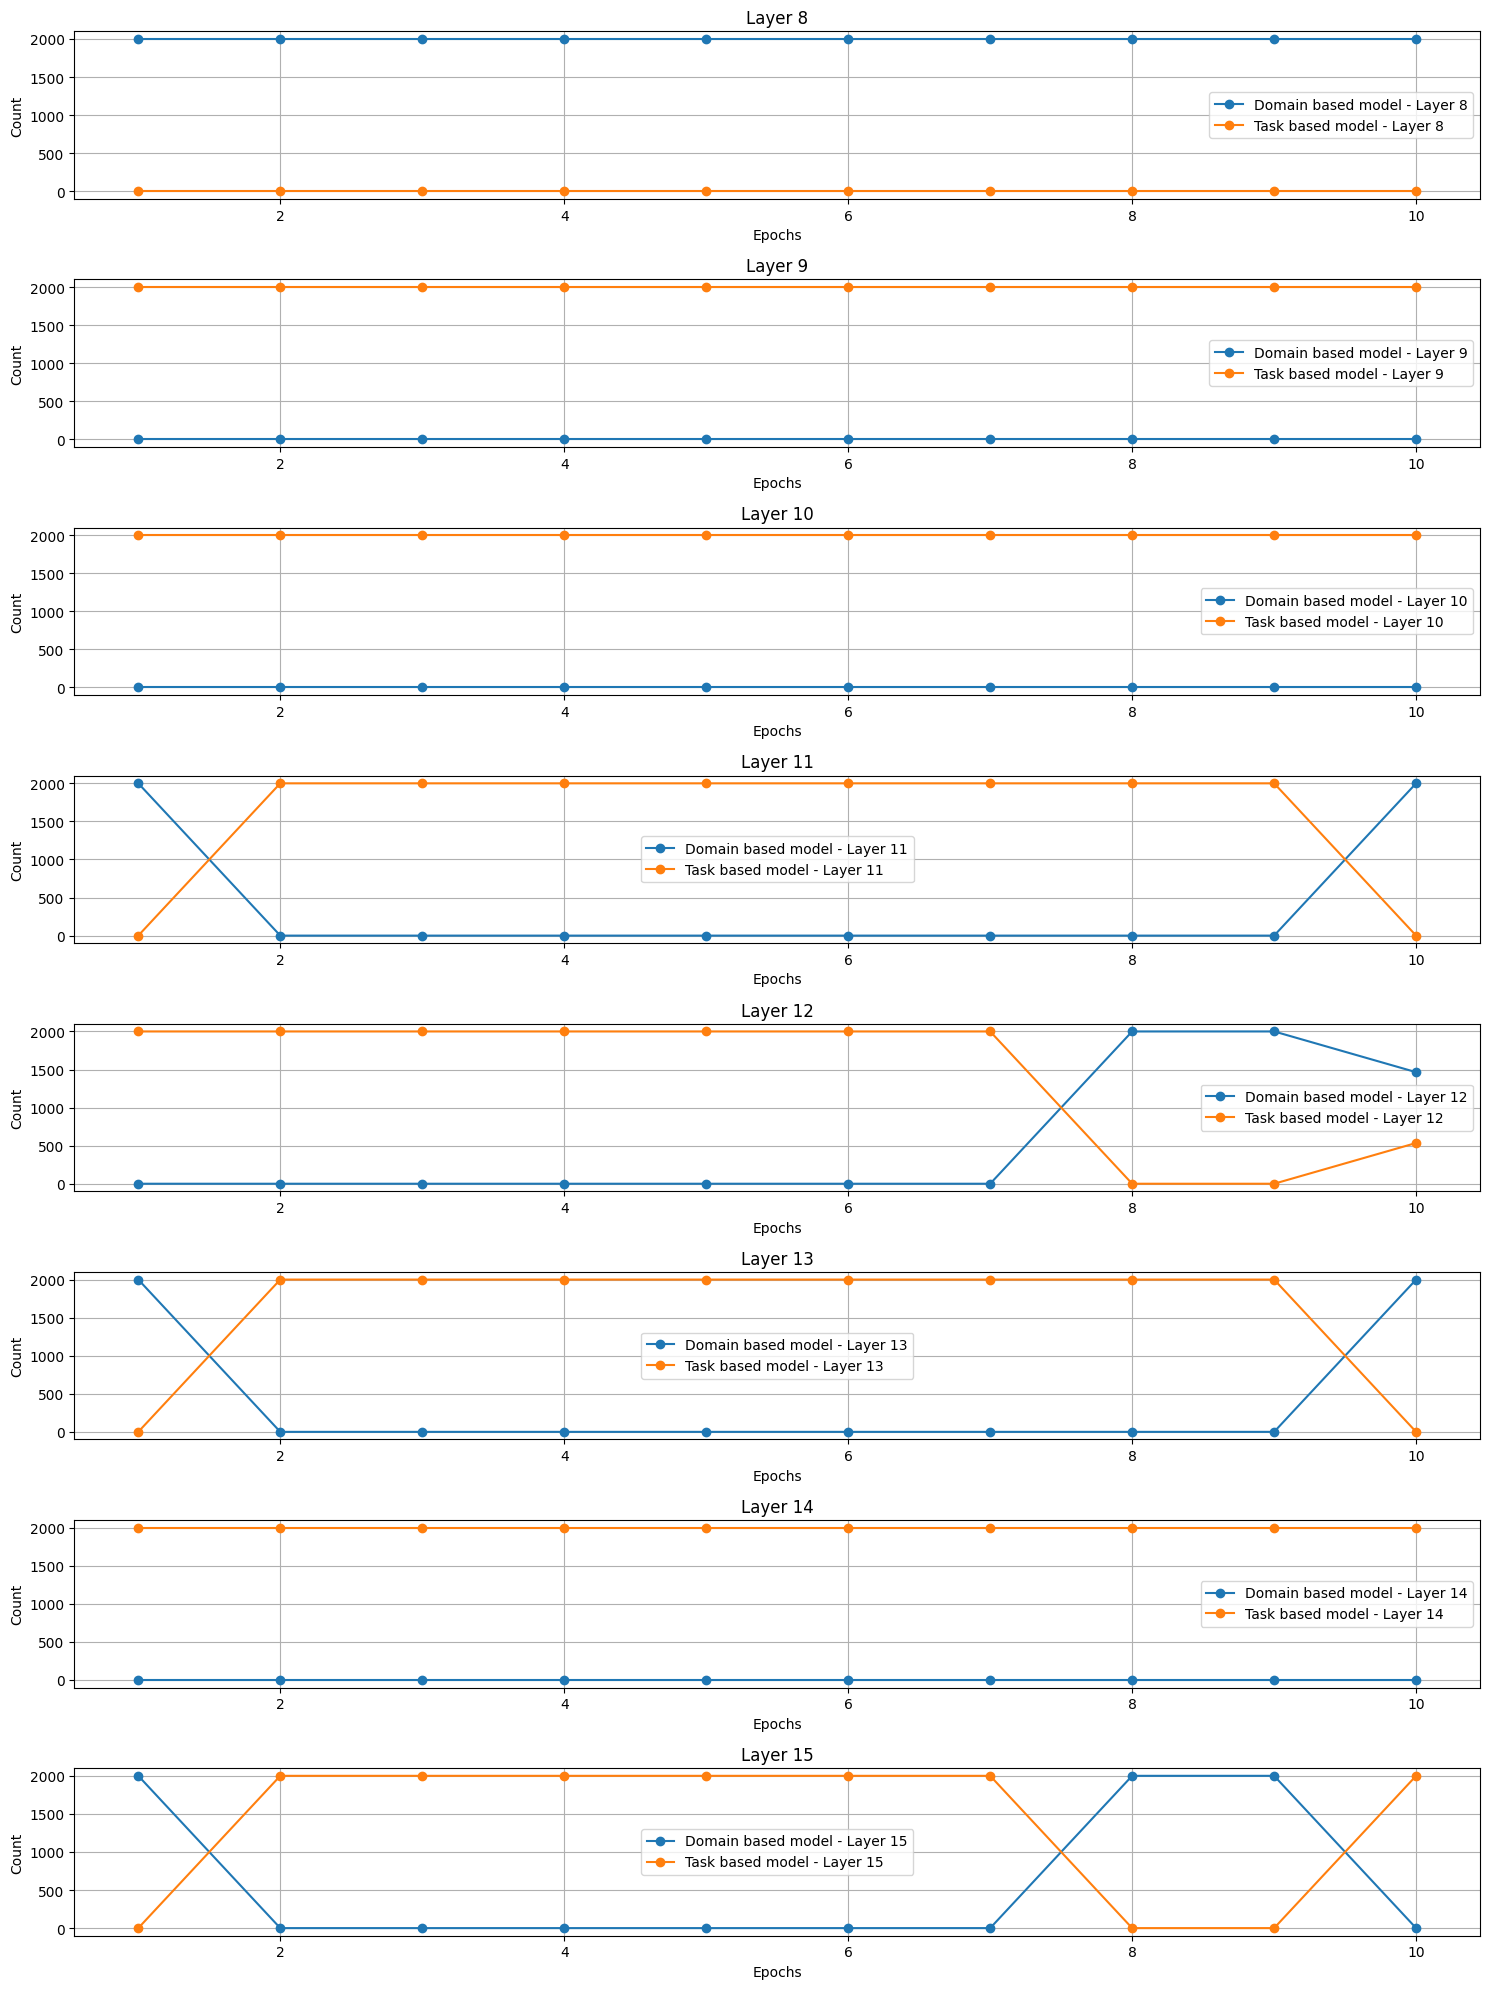

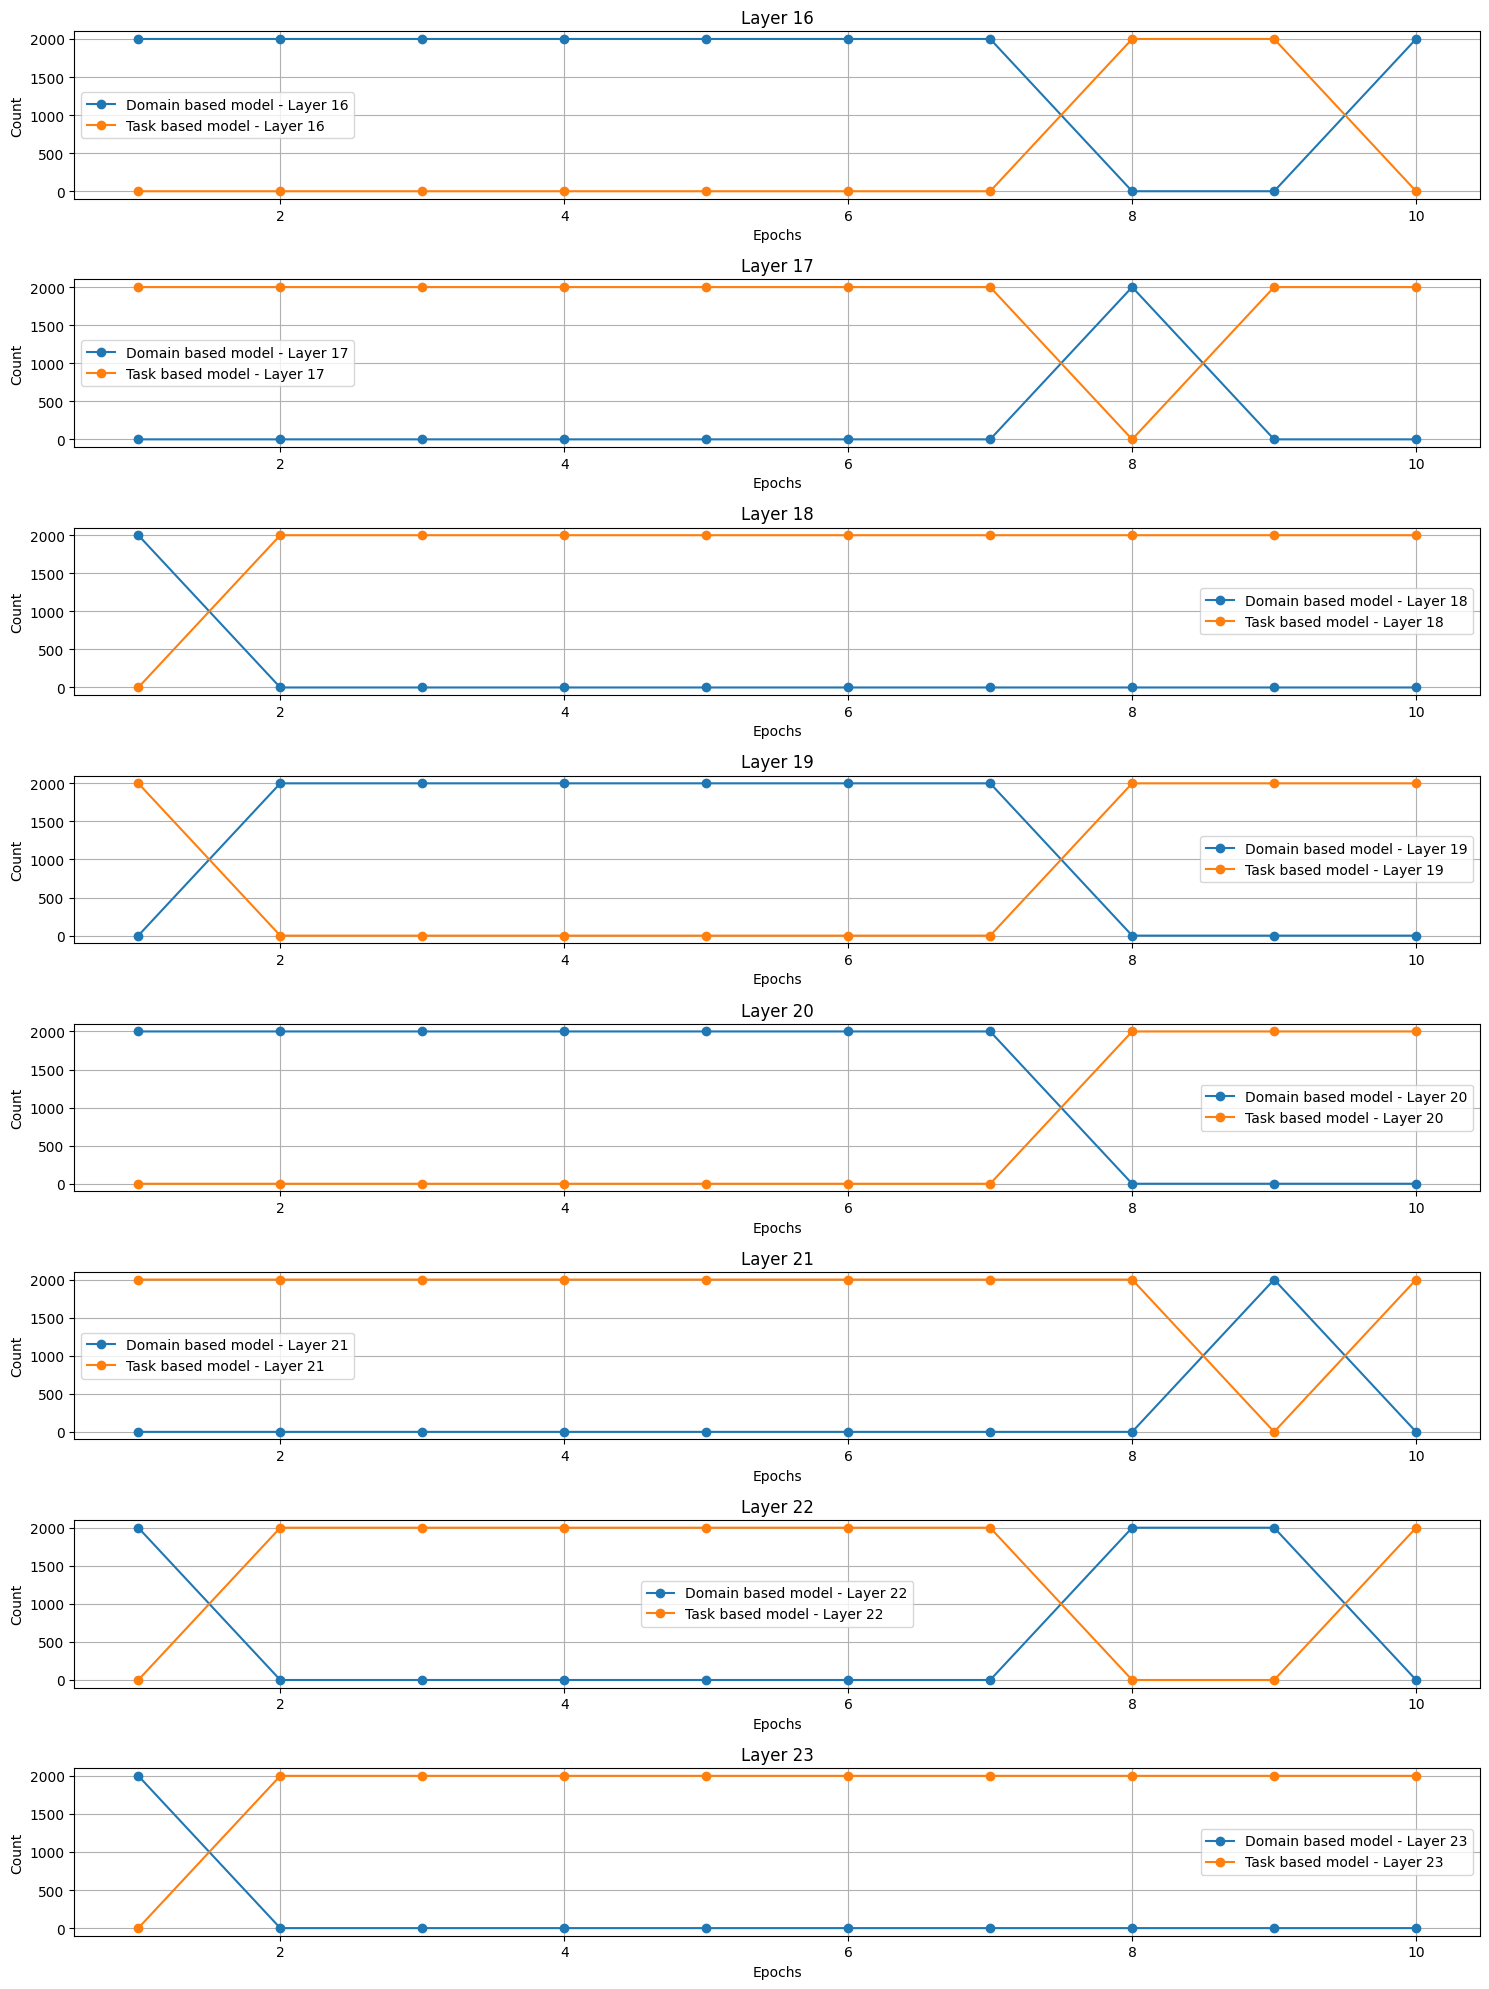

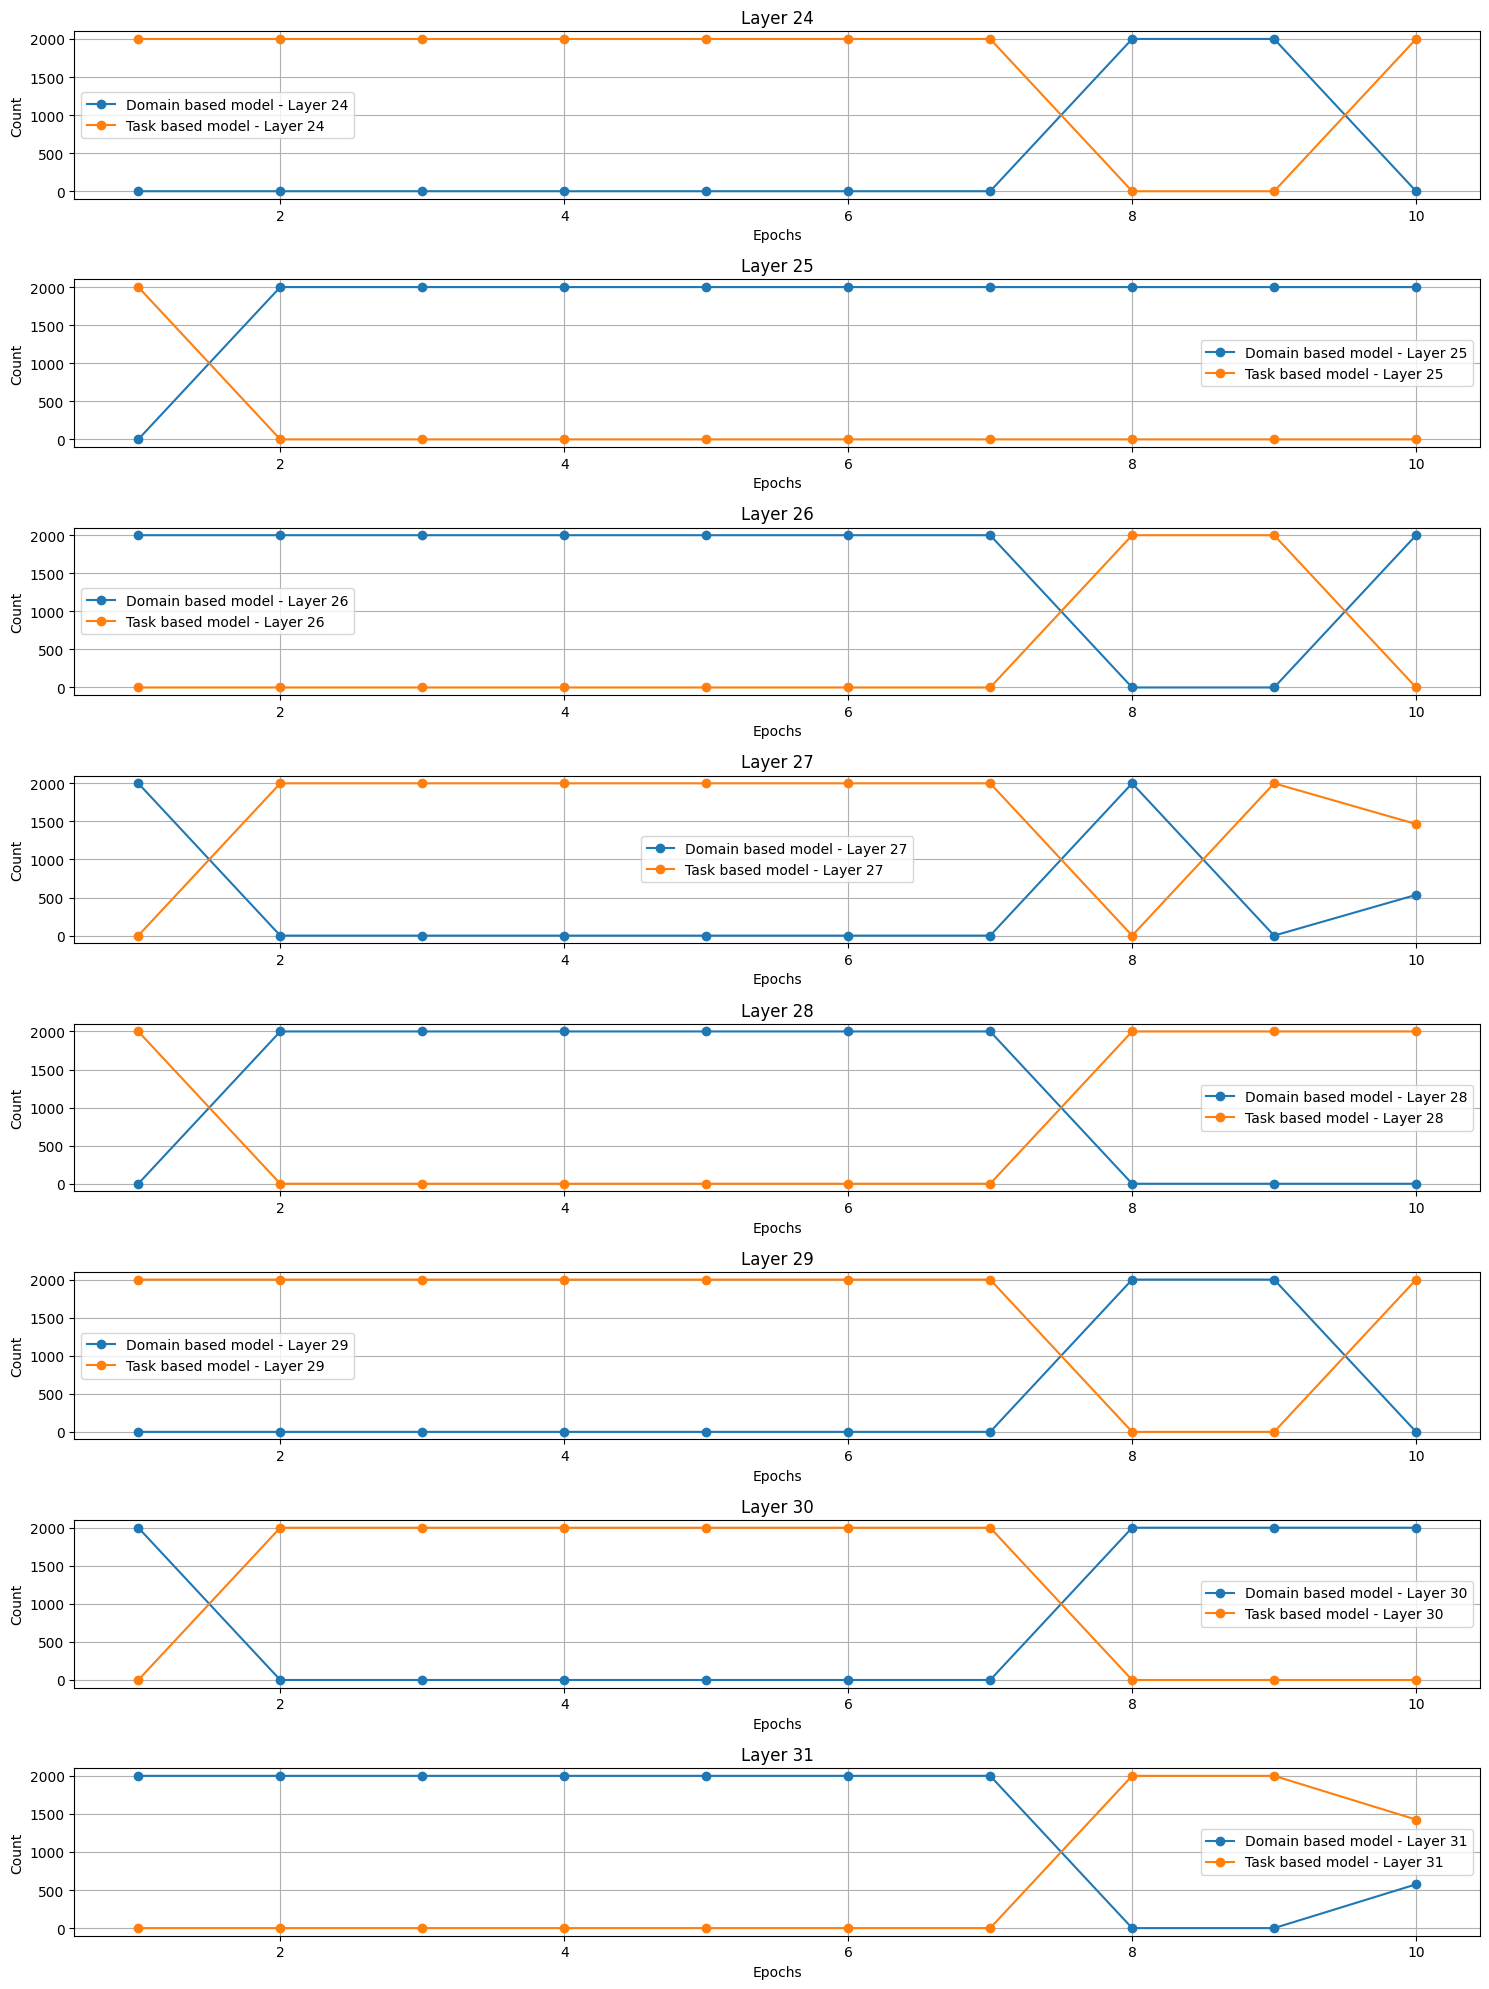

In [12]:
import torch
import matplotlib.pyplot as plt

# Number of layers
num_layers = pairs[0][0].size(0)

# Extract counts layer by layer for each epoch
model1_layer_counts = [[pair[0][layer].item() for pair in pairs] for layer in range(num_layers)]
model2_layer_counts = [[pair[1][layer].item() for pair in pairs] for layer in range(num_layers)]

# Plot the results layer by layer, divided into four plots with 8 subplots each
epochs = list(range(1, len(pairs) + 1))

# Save the plots
for plot_num in range(4):
    plt.figure(figsize=(15, 20))
    for i in range(8):
        layer = plot_num * 8 + i
        plt.subplot(8, 1, i + 1)
        plt.plot(epochs, model1_layer_counts[layer], label=f'Domain based model - Layer {layer}', marker='o')
        plt.plot(epochs, model2_layer_counts[layer], label=f'Task based model - Layer {layer}', marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Count')
        plt.title(f'Layer {layer}')
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'plots/layer_plots_part_{plot_num + 1}.png')
    plt.show()



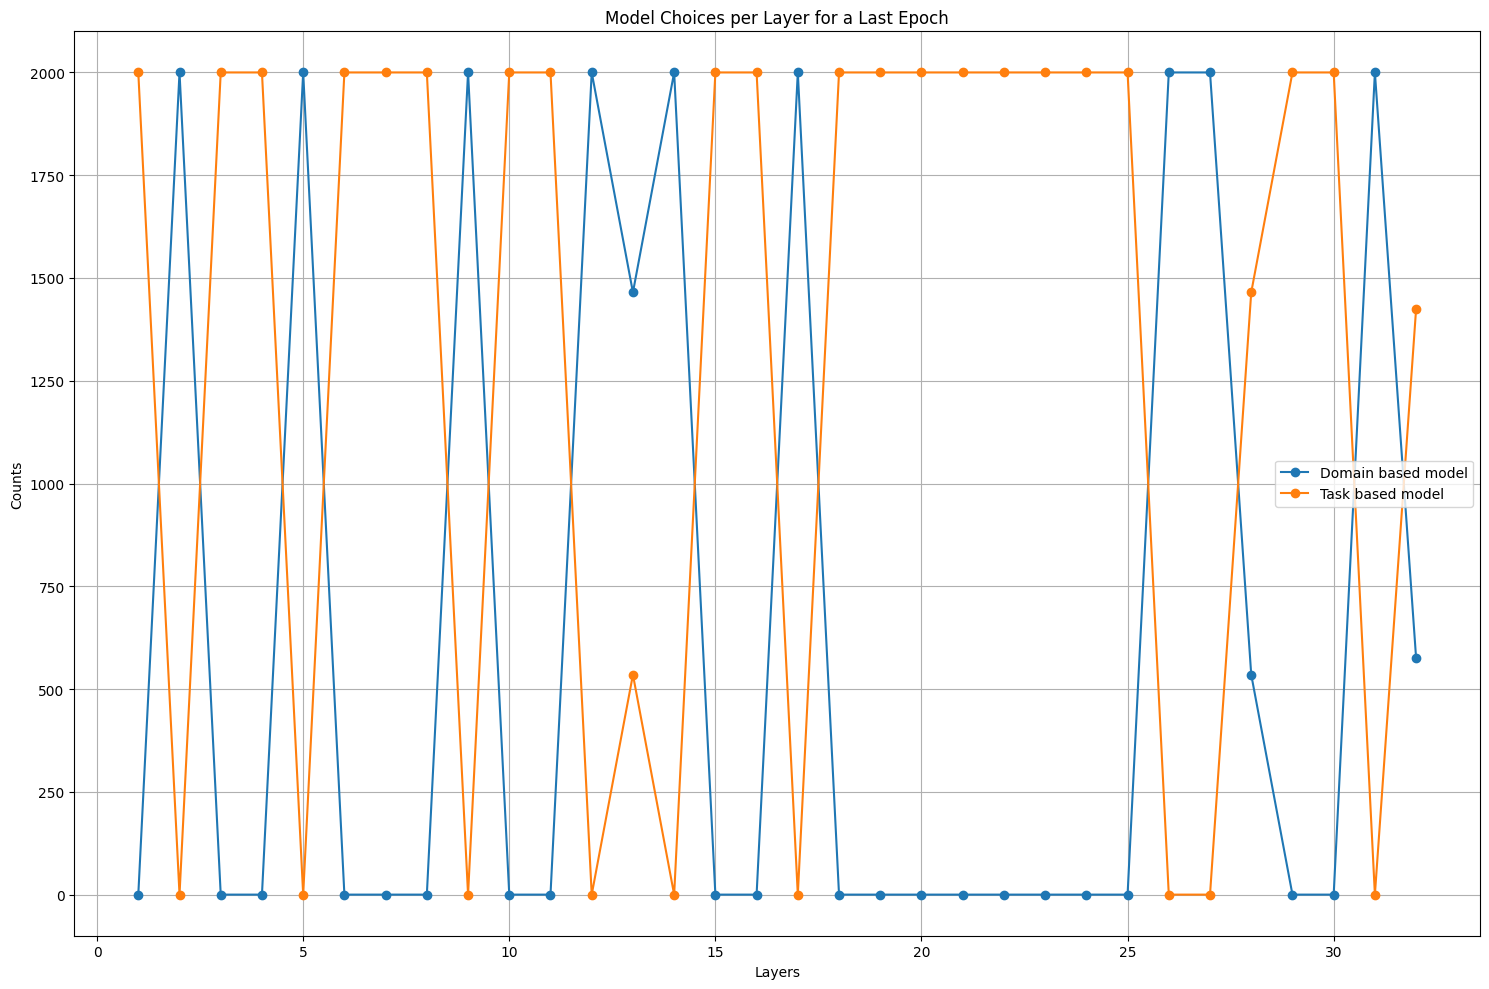

In [10]:
import torch
import matplotlib.pyplot as plt

# Extract counts for the single epoch
model1_counts = pairs[-1][0].tolist()
model2_counts = pairs[-1][1].tolist()
layers = list(range(1, len(model1_counts) + 1))

# Plot the results
plt.figure(figsize=(15, 10))
plt.plot(layers, model1_counts, label='Domain based model', marker='o')
plt.plot(layers, model2_counts, label='Task based model', marker='o')
plt.xlabel('Layers')
plt.ylabel('Counts')
plt.title('Model Choices per Layer for a Last Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/last_epoch_layer_mini.png')
plt.show()


In [10]:
import re
import torch

def extract_tensors(file_path):
    tensors = []
    tensor_pattern = re.compile(r'tensor\(\[(.*?)\]\)', re.DOTALL)
    
    with open(file_path, 'r') as file:
        content = file.read()
        matches = tensor_pattern.findall(content)
        
        for match in matches:
            tensor_values = list(map(int, match.split(',')))
            tensor = torch.tensor(tensor_values)
            tensors.append(tensor)
    
    return tensors

file_path = 'training_final_mega.txt'
extracted_tensors = extract_tensors(file_path)

# pairs = []
# for i in range(250, len(extracted_tensors)+1, 250):
#     pairs.append([extracted_tensors[i-2], extracted_tensors[i-1]])
    # print([extracted_tensors[i-1], extracted_tensors[i]])


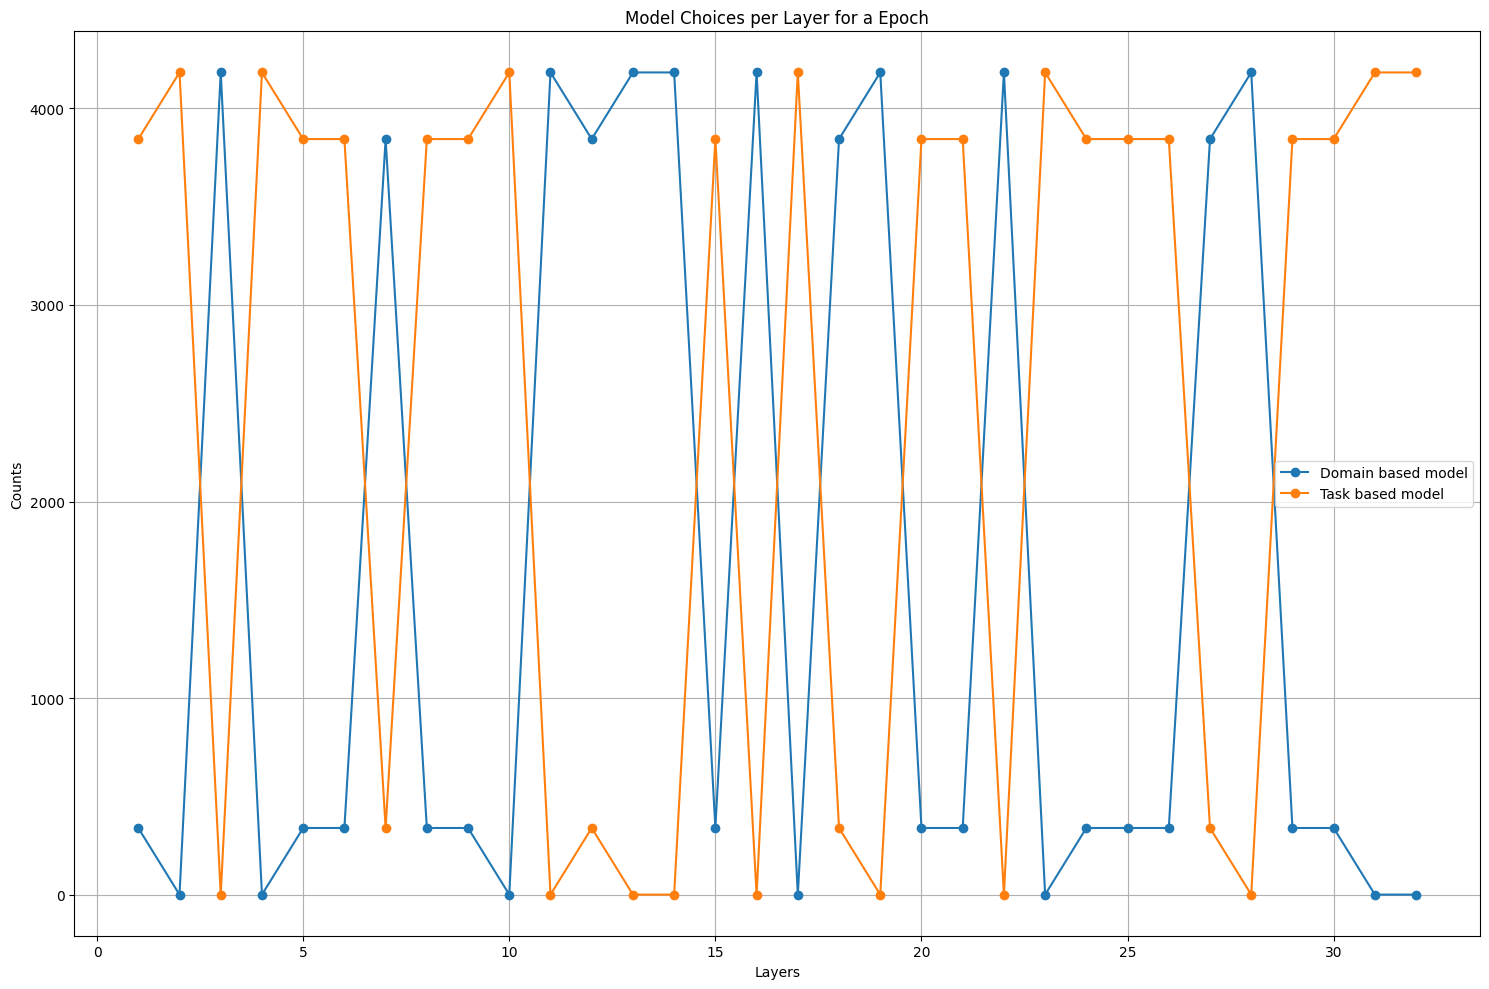

In [13]:
import torch
import matplotlib.pyplot as plt

# Extract counts for the single epoch
model1_counts = extracted_tensors[-2].tolist()
model2_counts = extracted_tensors[-1].tolist()
layers = list(range(1, len(model1_counts) + 1))

# Plot the results
plt.figure(figsize=(15, 10))
plt.plot(layers, model1_counts, label='Domain based model', marker='o')
plt.plot(layers, model2_counts, label='Task based model', marker='o')
plt.xlabel('Layers')
plt.ylabel('Counts')
plt.title('Model Choices per Layer for a Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/epoch_layer_mega.png')
plt.show()
